In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from datetime import datetime
start_time = datetime.now()

In [2]:
data = pd.read_csv('NY property data.csv', index_col = 0)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("\nFeatures : \n", data.columns.tolist())
print("\nMissing values : \n" , data.isnull().sum())
print("\nUnique values   : ", data.nunique())

Rows     :  1070994
Columns  :  31

Features : 
 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Missing values : 
 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: i

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non

In [6]:
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [7]:
# category = data.select_dtypes(include = ['object']).columns

In [8]:
len(num_cols) + len(cat_cols) == 31

True

In [9]:
num_dt = data[num_cols]
cat_dt = data[cat_cols]

In [10]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [11]:
# summary statistics-numerical variables
summ_num = pd.DataFrame(index = num_dt.columns)
summ_num['Data Type'] = num_dt.dtypes.values
summ_num['# Nonnull records'] = num_dt.count().values
summ_num['# Non-zero records'] = num_dt.astype(bool).sum(axis=0)
summ_num['% Populated'] = round(summ_num['# Nonnull records']/num_dt.shape[0]*100,2)
summ_num['# Unique values'] = num_dt.nunique().values
summ_num['Mean'] = round(num_dt.mean(),2)
summ_num['Std'] = round(num_dt.std(),2)
summ_num['Min'] = round(num_dt.min(),2)
summ_num['Max'] = round(num_dt.max(),2)
summ_num

,Data Type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


In [12]:
summ_cat = pd.DataFrame(index = cat_dt.columns)
summ_cat['Data Type'] = cat_dt.dtypes.values
summ_cat['# Nonnull records'] = cat_dt.count().values
summ_cat['% Populated'] = round(summ_cat['# Nonnull records']/cat_dt.shape[0]*100,2)
summ_cat['# Unique values'] = cat_dt.nunique().values

In [13]:
temp = []
for col in cat_cols:
    temp.append(cat_dt[col].value_counts().idxmax())
summ_cat['Most common value'] = temp

In [14]:
summ_cat

,Data Type,# Nonnull records,% Populated,# Unique values,Most common value
BBLE,object,1070994,100.00,1070994,4000341043
B,int64,1070994,100.00,5,4
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
EXT,object,354305,33.08,3,G
EXCD1,float64,638488,59.62,129,1017.00


In [15]:
data.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [16]:
data.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,nan,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,nan,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,nan,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,nan,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,nan,FINAL,2010/11,AC-TR


https://www1.nyc.gov/site/finance/taxes/definitions-of-property-assessment-terms.page

Field 1 \
Field Name: BBLE \
Description: Concatenation of Borough code, block code, LOT code;one unique number for each record.

Field 2 \
Field Name: B \
Description: Borough Codes

Text(0.5, 1.0, 'Number of properties in different boroughs')

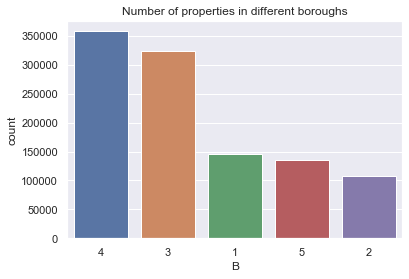

In [64]:
sns.set_theme(style = 'darkgrid')
fig1 = sns.countplot(x = 'B',data = data, order = data['B'].value_counts().index)
plt.title("Number of properties in different boroughs")

Field 3 \
Field Name: BLOCK \
Description: Up to 5 digits number representing Block codes within different Boroughs

In [51]:
BLOCK = cat_dt['BLOCK'].value_counts().rename_axis('Unique_values_BLOCK').reset_index(name='Counts')
BLOCK[:15]

,Unique_values_BLOCK,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


Field 4 \
Field Name: LOT \
Description: Up to 4 digits number representing Lot codes within different Borough & Block

In [52]:
LOT = cat_dt['LOT'].value_counts().rename_axis('Unique_values_LOT').reset_index(name='Counts')[:15]
LOT[:15]

,Unique_values_LOT,Counts
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982
7,18,11979
8,25,11949
9,21,11840


Field 5 \
Field Name: EASEMENT  \
Description: Types of easement

Text(0.5, 1.0, 'Number of properties with various kinds of easement')

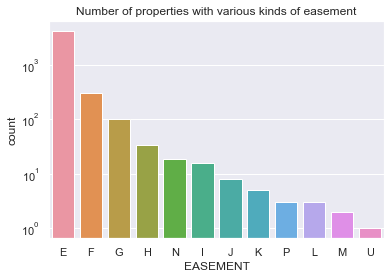

In [66]:
fig2 = sns.countplot(x = 'EASEMENT', data=data, order = data['EASEMENT'].value_counts().index)
fig2.set_yscale("log")
fig2.set_title('Number of properties with various kinds of easement')

Field 6 \
Field Name: OWNER \
Description: Properties's owner

In [219]:
OWNER = cat_dt['OWNER'].value_counts().rename_axis('Unique_values_OWNER').reset_index(name='Counts')
OWNER.tail()

,Unique_values_OWNER,Counts
863341,"MARBELLA-ZELADA, DIAN",1
863342,WING KIN YEE,1
863343,WELDON BRADFORD,1
863344,YAN YI WONG,1
863345,"GUBBAY, DAVID",1


Field 7 \
Field Name: BLDGCL \
Description: 

In [220]:
BLDGCL = cat_dt['BLDGCL'].value_counts().rename_axis('Unique_values_BLDCGL').reset_index(name='Counts')
BLDGCL.tail()

,Unique_values_BLDCGL,Counts
195,I3,4
196,I2,4
197,H7,3
198,Y5,1
199,E6,1


Field 8 \
Field Name: TAXCLASS \
Description: Current property tax class code

Tax Classes: Properties in New York City are divided into four classes, each treated differently under the law.
1. Class 1: One-to three-unit, predominantly residential properties. Also includes certain vacant land and certain types of condominiums.
2. Class 2: Residential property with 3+ units, including condos and co-ops
3. Class 3: Utility company equipment and special franchise property
4. Class 4: All other real property, including office buildings, factories, stores, hotels, and lofts

Text(0.5, 1.0, 'Number of properties with various kinds of class')

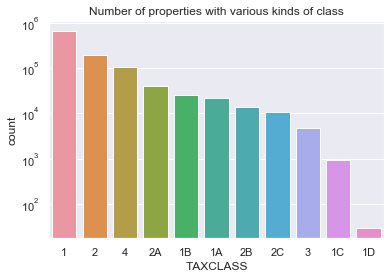

In [67]:
fig3 = sns.countplot(x = 'TAXCLASS', data=data, order= data['TAXCLASS'].value_counts().index)
fig3.set_yscale("log")
fig3.set_title('Number of properties with various kinds of class')

Field 9 \
Field Name: LTFRONT \
Description: Lot frontage in feet

In [122]:
data['LTFRONT'].describe(percentiles = [0.5,0.75,0.995])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.5%       375.00
max        9999.00
Name: LTFRONT, dtype: float64

In [123]:
tmp = data[data['LTFRONT'] <= 375]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of LTFRONT')

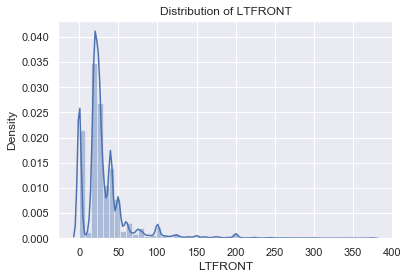

In [124]:
fig4 = sns.distplot(tmp.LTFRONT, bins = 50)
fig4.set_title('Distribution of LTFRONT')

Field 10 \
Field Name: LTDEPTH \
Description: Lot depth in feet 

In [239]:
data['LTDEPTH'].describe(percentiles = [0.18,0.25,0.4,0.83,0.98,0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
18%           49.00
25%           80.00
40%          100.00
50%          100.00
83%          101.00
98%          200.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [120]:
tmp = data[data['LTDEPTH'] <= 425]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of LTDEPTH')

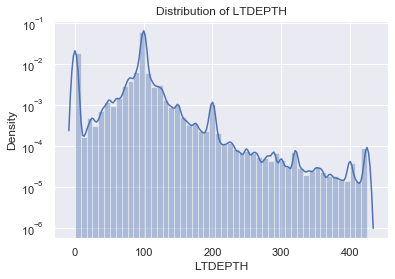

In [121]:
fig5 = sns.distplot(tmp.LTDEPTH, bins = 50)
fig5.set_yscale("log")
fig5.set_title('Distribution of LTDEPTH')

Field 11 \
Field Name: EXT \
Description: E-Extension, G- Garage, EG- Extension and Garage 

Text(0.5, 1.0, 'Number of properties with various kinds of extensions/garage')

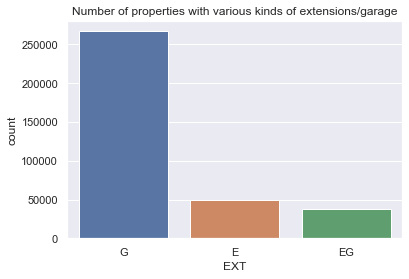

In [115]:
fig6 = sns.countplot(x = 'EXT', data=data, order = data['EXT'].value_counts().index)
fig6.set_title('Number of properties with various kinds of extensions/garage')

Field 12 \
Field Name: STORIES \
Description: Number of floors in the building

In [125]:
data['STORIES'].describe(percentiles = [0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [127]:
tmp = data[data['STORIES'] <= 50]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of STORIES of properties')

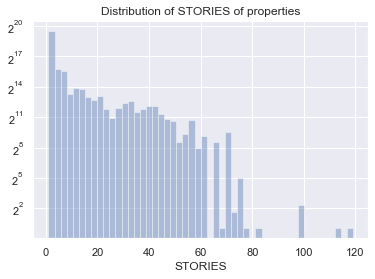

In [160]:
fig7 = sns.distplot(tmp['STORIES'],kde=False, bins = 50)
fig7.set_yscale('log',basey = 2)
fig7.set_title('Distribution of STORIES of properties')

Field 13 \
Field Name: FULLVAL \
Description: Total Market Value

In [167]:
data['FULLVAL'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [168]:
tmp = data[data['FULLVAL'] <= 2000000]

In [169]:
import matplotlib.pyplot as pyplot

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Market Value of properties')

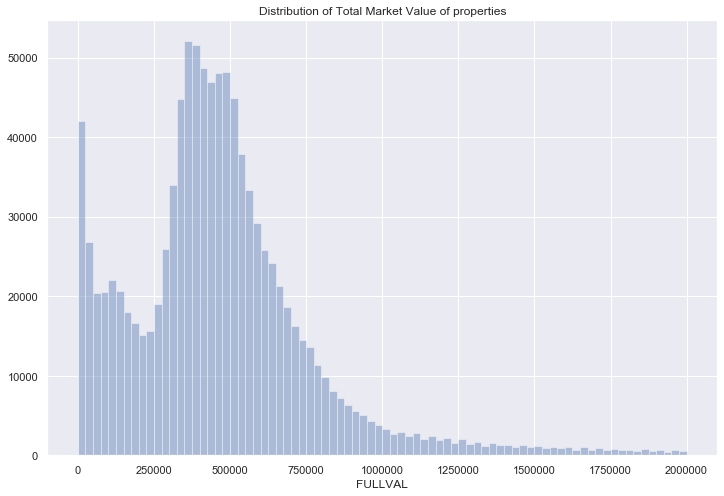

In [170]:
a4_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig8 = sns.distplot(tmp.FULLVAL, kde=False, bins = 80)
fig8.set_title('Distribution of Total Market Value of properties')

Field 14 \
Field Name: AVLAND \
Description: Market value of land

In [171]:
data['AVLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [179]:
tmp = data[data['AVLAND'] <= 50000]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Market value of land')

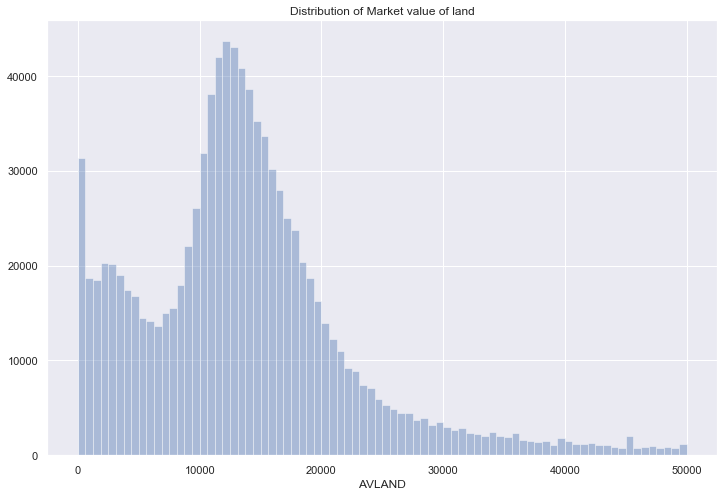

In [180]:
a4_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig9 = sns.distplot(tmp.AVLAND, kde=False, bins = 80)
fig9.set_title('Distribution of Market value of land')

Field 15 \
Field Name: AVTOT \
Description: Market value of land

In [182]:
data['AVTOT'].describe(percentiles = [0.5,0.75,0.90])

count      1070994.00
mean        227238.17
std        6877529.31
min              0.00
50%          25340.00
75%          45438.00
90%         158850.00
max     4668308947.00
Name: AVTOT, dtype: float64

In [183]:
tmp = data[data['AVTOT'] <= 50000]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of total Market value')

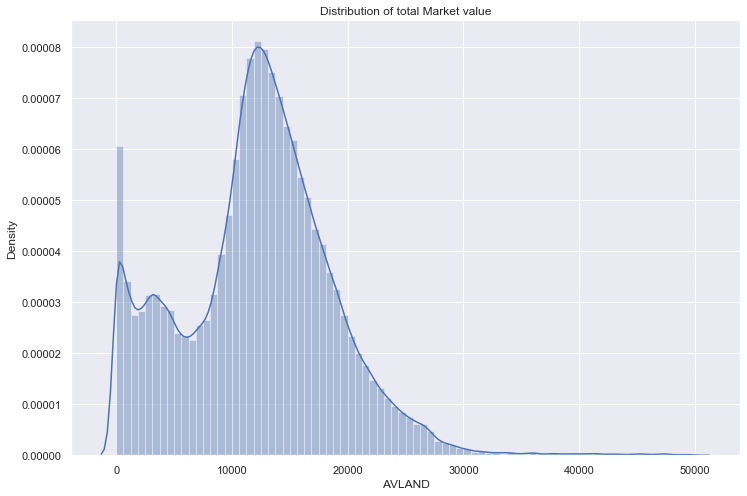

In [184]:
a4_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig10 = sns.distplot(tmp.AVLAND, bins = 80)
fig10.set_title('Distribution of total Market value')

Field 16 \
Field Name: EXLAND \
Description: Tentative transitional exempt land value

In [187]:
data['EXLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [189]:
tmp = data[data['EXLAND'] <= 20000]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tentative transitional exempt land value')

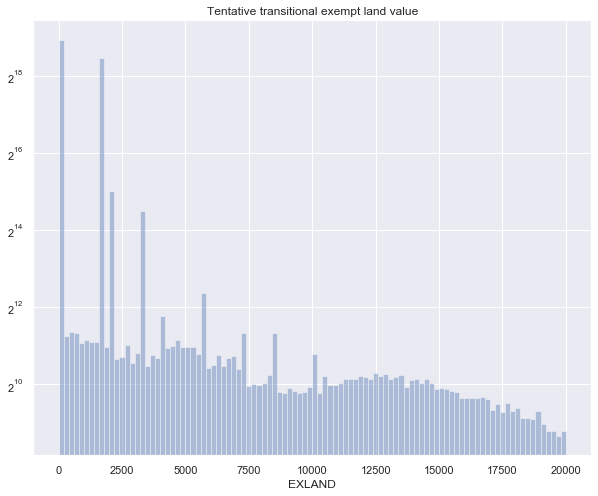

In [192]:
a4_dims = (10, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig11 = sns.distplot(tmp.EXLAND,kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Tentative transitional exempt land value')

Field 17 \
Field Name: EXTOT \
Description: Tentative transitional exempt total value

In [193]:
data['EXTOT'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         91186.98
std        6508402.82
min              0.00
50%           1620.00
75%           2090.00
95%          61420.40
max     4668308947.00
Name: EXTOT, dtype: float64

In [194]:
tmp = data[data['EXTOT'] <= 60000]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tentative transitional exempt total value')

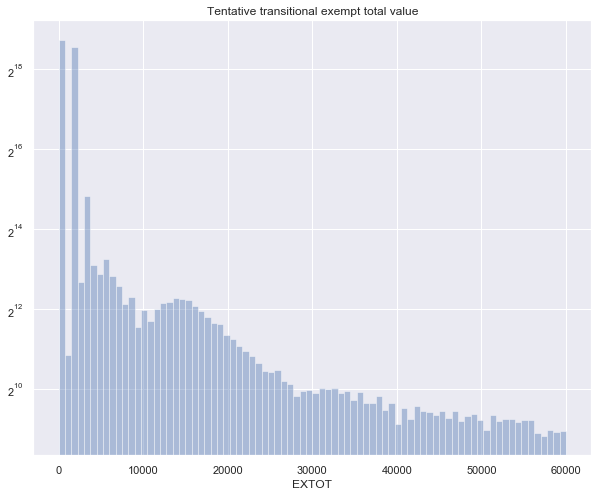

In [196]:
a4_dims = (10, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig12 = sns.distplot(tmp.EXTOT,kde = False, bins = 80)
fig12.set_yscale('log', basey = 2)
fig12.set_title('Tentative transitional exempt total value')

Field 18  \
Field Name: EXCD1 \
Description:

In [197]:
EXCD1 = cat_dt['EXCD1'].value_counts().rename_axis('Unique_values_EXCD1').reset_index(name='Counts')
EXCD1[:15]

,Unique_values_EXCD1,Counts
0,1017.00,425348
1,1010.00,49756
2,1015.00,31323
3,5113.00,23858
4,1920.00,17594
5,5110.00,16834
6,5114.00,14984
7,5111.00,10609
8,1021.00,6613
9,1986.00,4231


Field 19 \
Field Name: STADDR \
Description: Street name of property

In [199]:
STADDR = cat_dt['STADDR'].value_counts().rename_axis('Unique_values_STADDR').reset_index(name='Counts')
STADDR[:15]

,Unique_values_STADDR,Counts
0,501 SURF AVENUE,902
1,330 EAST 38 STREET,817
2,322 WEST 57 STREET,720
3,155 WEST 68 STREET,671
4,20 WEST 64 STREET,657
5,1 IRVING PLACE,650
6,220 RIVERSIDE BOULEVARD,628
7,360 FURMAN STREET,599
8,200 EAST 66 STREET,585
9,30 WEST 63 STREET,562


Field 20 \
Field Name: ZIP \
Description: Postal ZIP code of the property

In [204]:
ZIP = cat_dt['ZIP'].value_counts().rename_axis('Unique_values_ZIP').reset_index(name='Counts')
ZIP['Unique_values_ZIP'] = ZIP['Unique_values_ZIP'].astype('int64')
ZIP[:15]

,Unique_values_ZIP,Counts
0,10314,24606
1,11234,20001
2,10312,18127
3,10462,16905
4,10306,16578
5,11236,15678
6,11385,14921
7,11229,12793
8,11211,12710
9,11207,12293


Field 21 \
Field Name: EXMPTCL \
Description: Exempt class used for fully exempt properties only

Text(0.5, 1.0, 'Number of properties with various kinds of Exempt class(for fully exempt properties only)')

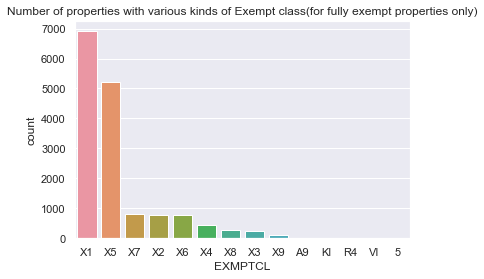

In [207]:
fig13 = sns.countplot(x = 'EXMPTCL', data=data, order = data['EXMPTCL'].value_counts().index)
fig13.set_title('Number of properties with various kinds of Exempt class(for fully exempt properties only)')
                

Field 22 \
Field Name: BLDFRONT \
Description: Building frontage in feet

In [214]:
data['BLDFRONT'].describe(percentiles = [0.5,0.75,0.99])

count   1070994.00
mean         23.04
std          35.58
min           0.00
50%          20.00
75%          24.00
99%         175.00
max        7575.00
Name: BLDFRONT, dtype: float64

In [215]:
tmp = data[data['BLDFRONT'] <= 200]

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Building frontage in feet')

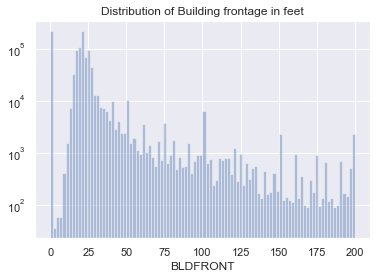

In [216]:
fig14 = sns.distplot(tmp.BLDFRONT,kde = False, bins = 100)
fig14.set_yscale('log')
fig14.set_title('Distribution of Building frontage in feet')

In [ ]:
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']